# Import requests and Beautifulsoup to web srape from a website to get my crime data for 52 states from 2011 to 2020

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    
    table = soup.find('table', {'class': 'wikitable'})


 pulling all data from the website for all the data of all years and saved to violent_crime_rates_all_years.csv

In [2]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    
    table = soup.find('table', {'class': 'wikitable'})


    with open('violent_crime_rates_all_years.csv', 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)

        
        header = ['State']
        header.extend([year.text.strip() for year in table.find_all('th')[2:]])
        csv_writer.writerow(header)

        
        for row in table.find_all('tr')[2:]:  
            columns = row.find_all(['th', 'td'])  

            if len(columns) > 1:  
                state = columns[0].text.strip()
                rates = [column.text.strip() for column in columns[1:]]
                csv_writer.writerow([state] + rates)

    print("Data for all years has been successfully saved to 'violent_crime_rates_all_years.csv'.")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Data for all years has been successfully saved to 'violent_crime_rates_all_years.csv'.


 open the csv file to read 

In [3]:
import csv

with open('violent_crime_rates_all_years.csv', 'r', newline='', encoding='utf-8') as csvfile:

    csv_reader = csv.reader(csvfile)

    for row in csv_reader:
        print(row)

['State', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '', '', '', '', '', '', '', '', '', '', '', '', 'United States\u202f*', '1,313,105', '398.5', '379.4', '383.4', '394.0', '397.5', '383.2', '372.0', '367.9', '387.8', '386.3']
['Washington\u202f* D.C.', '7,127', '999.8', '1045.2', '997.1', '1002.7', '1203.5', '1269.1', '1242.6', '1281.9', '1241.8', '1202.1']
['Alaska\u202f*', '6,126', '837.8', '865.0', '891.7', '856.7', '804.6', '730.2', '635.5', '602.6', '604.1', '606.5']
['New Mexico\u202f*', '16,393', '778.3', '824.0', '842.8', '778.6', '699.4', '656.1', '597.7', '596.7', '559.6', '567.5']
['Tennessee\u202f*', '46,328', '672.7', '598.9', '630.4', '655.0', '638.5', '612.1', '610.7', '579.7', '638.5', '608.2']
['Arkansas\u202f*', '20,363', '671.9', '580.8', '561.6', '566.0', '554.3', '521.3', '480.2', '445.7', '469.6', '480.9']
['Arizona\u202f*', '35,980', '654.8', '447.1', '475.7', '505.7', '471.0', '410.2', '392.7', '405.8', '428.6', '405.9']
['

 install tabulate to format my dateframe in  readable format

 Read the CSV file into a DataFrame and save DataFrame to new name and display the first few rows of the DataFrame

In [4]:
import pandas as pd

violent_crime = pd.read_csv('violent_crime_rates_all_years.csv')


print(violent_crime.head())

               State    2020   2019    2018   2017    2016    2015    2014  \
0  Washington * D.C.   7,127  999.8  1045.2  997.1  1002.7  1203.5  1269.1   
1           Alaska *   6,126  837.8   865.0  891.7   856.7   804.6   730.2   
2       New Mexico *  16,393  778.3   824.0  842.8   778.6   699.4   656.1   
3        Tennessee *  46,328  672.7   598.9  630.4   655.0   638.5   612.1   
4         Arkansas *  20,363  671.9   580.8  561.6   566.0   554.3   521.3   

     2013    2012  ...  398.5  379.4  383.4  394.0  397.5  383.2  372.0  \
0  1242.6  1281.9  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   635.5   602.6  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   597.7   596.7  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3   610.7   579.7  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   480.2   445.7  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   367.9  387.8  386.3  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    

 Read the csv file into a pandas DataFrame, keep the columns i want to keep

In [5]:
import pandas as pd
file_path = 'violent_crime_rates_all_years.csv'

violent_crime= pd.read_csv(file_path)

columns_to_keep = ['State', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']

violent_crime = violent_crime[columns_to_keep]


In [6]:
violent_crime

,State,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Washington * D.C.,"7,127",999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8
1,Alaska *,"6,126",837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1
2,New Mexico *,"16,393",778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6
3,Tennessee *,"46,328",672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5
4,Arkansas *,"20,363",671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6
5,Arizona *,"35,980",654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6
6,Louisiana *,"29,704",639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3
7,Missouri *,"33,385",542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3
8,South Carolina *,"27,691",530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5
9,South Dakota *,"4,476",501.4,397.1,396.4,429.8,422.0,383.1,328.3,398.7,323.8


 Remove the asterisk from my DataFrame and Print out the DataFrame out

In [7]:

violent_crime['State'] = violent_crime['State'].str.replace('*', '')


print(violent_crime)

               State       2020   2019    2018   2017    2016    2015    2014  \
0   Washington  D.C.      7,127  999.8  1045.2  997.1  1002.7  1203.5  1269.1   
1            Alaska       6,126  837.8   865.0  891.7   856.7   804.6   730.2   
2        New Mexico      16,393  778.3   824.0  842.8   778.6   699.4   656.1   
3         Tennessee      46,328  672.7   598.9  630.4   655.0   638.5   612.1   
4          Arkansas      20,363  671.9   580.8  561.6   566.0   554.3   521.3   
5           Arizona      35,980  654.8   447.1  475.7   505.7   471.0   410.2   
6         Louisiana      29,704  639.4   559.7  543.3   556.3   565.0   539.7   
7          Missouri      33,385  542.7   499.6  501.4   531.2   520.8   497.4   
8    South Carolina      27,691  530.7   510.1  500.8   506.1   506.8   504.5   
9      South Dakota       4,476  501.4   397.1  396.4   429.8   422.0   383.1   
10         Michigan      47,641  478.0   438.6  452.5   449.9   460.9   415.5   
11          Montana       5,

 Display the full DataFrame using display.max

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
violent_crime


,State,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Washington D.C.,"7,127",999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8
1,Alaska,"6,126",837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1
2,New Mexico,"16,393",778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6
3,Tennessee,"46,328",672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5
4,Arkansas,"20,363",671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6
5,Arizona,"35,980",654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6
6,Louisiana,"29,704",639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3
7,Missouri,"33,385",542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3
8,South Carolina,"27,691",530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5
9,South Dakota,"4,476",501.4,397.1,396.4,429.8,422.0,383.1,328.3,398.7,323.8


 Remove row 52 from the index using drop then displaying the DataFrame 

In [9]:
violent_crime = violent_crime.drop(violent_crime.index[52])

In [10]:
violent_crime

,State,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Washington D.C.,"7,127",999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8
1,Alaska,"6,126",837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1
2,New Mexico,"16,393",778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6
3,Tennessee,"46,328",672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5
4,Arkansas,"20,363",671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6
5,Arizona,"35,980",654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6
6,Louisiana,"29,704",639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3
7,Missouri,"33,385",542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3
8,South Carolina,"27,691",530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5
9,South Dakota,"4,476",501.4,397.1,396.4,429.8,422.0,383.1,328.3,398.7,323.8


 Pulled up the the states with the highest crime rate for each year using convert_to_numeric(value) to handle non-strings

In [11]:
import pandas as pd

columns_to_convert = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']

def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    except AttributeError:
        return pd.to_numeric(value, errors='coerce')

for column in columns_to_convert:
    violent_crime[column] = violent_crime[column].apply(convert_to_numeric)

violent_crime = violent_crime.fillna(0)


for column in columns_to_convert:
    highest_crime_state = violent_crime.loc[violent_crime[column].idxmax(), 'State']
    print(f"State with the highest crime rate in {column}: {highest_crime_state}")


State with the highest crime rate in 2020: California 
State with the highest crime rate in 2019: Washington  D.C.
State with the highest crime rate in 2018: Washington  D.C.
State with the highest crime rate in 2017: Washington  D.C.
State with the highest crime rate in 2016: Washington  D.C.
State with the highest crime rate in 2015: Washington  D.C.
State with the highest crime rate in 2014: Washington  D.C.
State with the highest crime rate in 2013: Washington  D.C.
State with the highest crime rate in 2012: Washington  D.C.
State with the highest crime rate in 2011: Washington  D.C.


 The top two states with the highest violent crimes from 2000 to 2020.
 California had the highest violent crimes rates in 2020 and Washington D.C. had the highest voilent crime rate from 2011 to 2019.

# Pulled up the the states with the lowest crime rate for each year using convert_to_numeric(value) to handle non-strings

In [12]:
import pandas as pd

columns_to_convert = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011']

def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    except AttributeError:
        return pd.to_numeric(value, errors='coerce')

for column in columns_to_convert:
    violent_crime[column] = violent_crime[column].apply(convert_to_numeric)

violent_crime = violent_crime.fillna(0)

for column in columns_to_convert:
    lowest_crime_state = violent_crime.loc[violent_crime[column].idxmin(), 'State']
    print(f"State with the lowest crime rate in {column}: {lowest_crime_state}")


State with the lowest crime rate in 2020: Vermont 
State with the lowest crime rate in 2019: Maine
State with the lowest crime rate in 2018: Maine
State with the lowest crime rate in 2017: Maine
State with the lowest crime rate in 2016: Maine
State with the lowest crime rate in 2015: Maine
State with the lowest crime rate in 2014: Vermont 
State with the lowest crime rate in 2013: Vermont 
State with the lowest crime rate in 2012: Vermont 
State with the lowest crime rate in 2011: Maine


  The two states with the lowest crime rate from 2011 to 2020.
  Maine had the lowest violent crime rates in 2011 and from 2015 to 2019 and Vermont from 2012 to 2014 and the lowest crime rate in 2020 

 DisPlay DataFrame 

 Saved my violent_crime DataFrame to a new csv file called new_crimefile.cvs

In [13]:
violent_crime.to_csv('new_violent_crimefile.csv', index=False)

In [14]:
violent_crime

,State,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Washington D.C.,7127,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8
1,Alaska,6126,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1
2,New Mexico,16393,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6
3,Tennessee,46328,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5
4,Arkansas,20363,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6
5,Arizona,35980,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6
6,Louisiana,29704,639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3
7,Missouri,33385,542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3
8,South Carolina,27691,530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5
9,South Dakota,4476,501.4,397.1,396.4,429.8,422.0,383.1,328.3,398.7,323.8


 A bar chart with the top two states during 2011-2020 years that had the greatest and lowest crime rates  

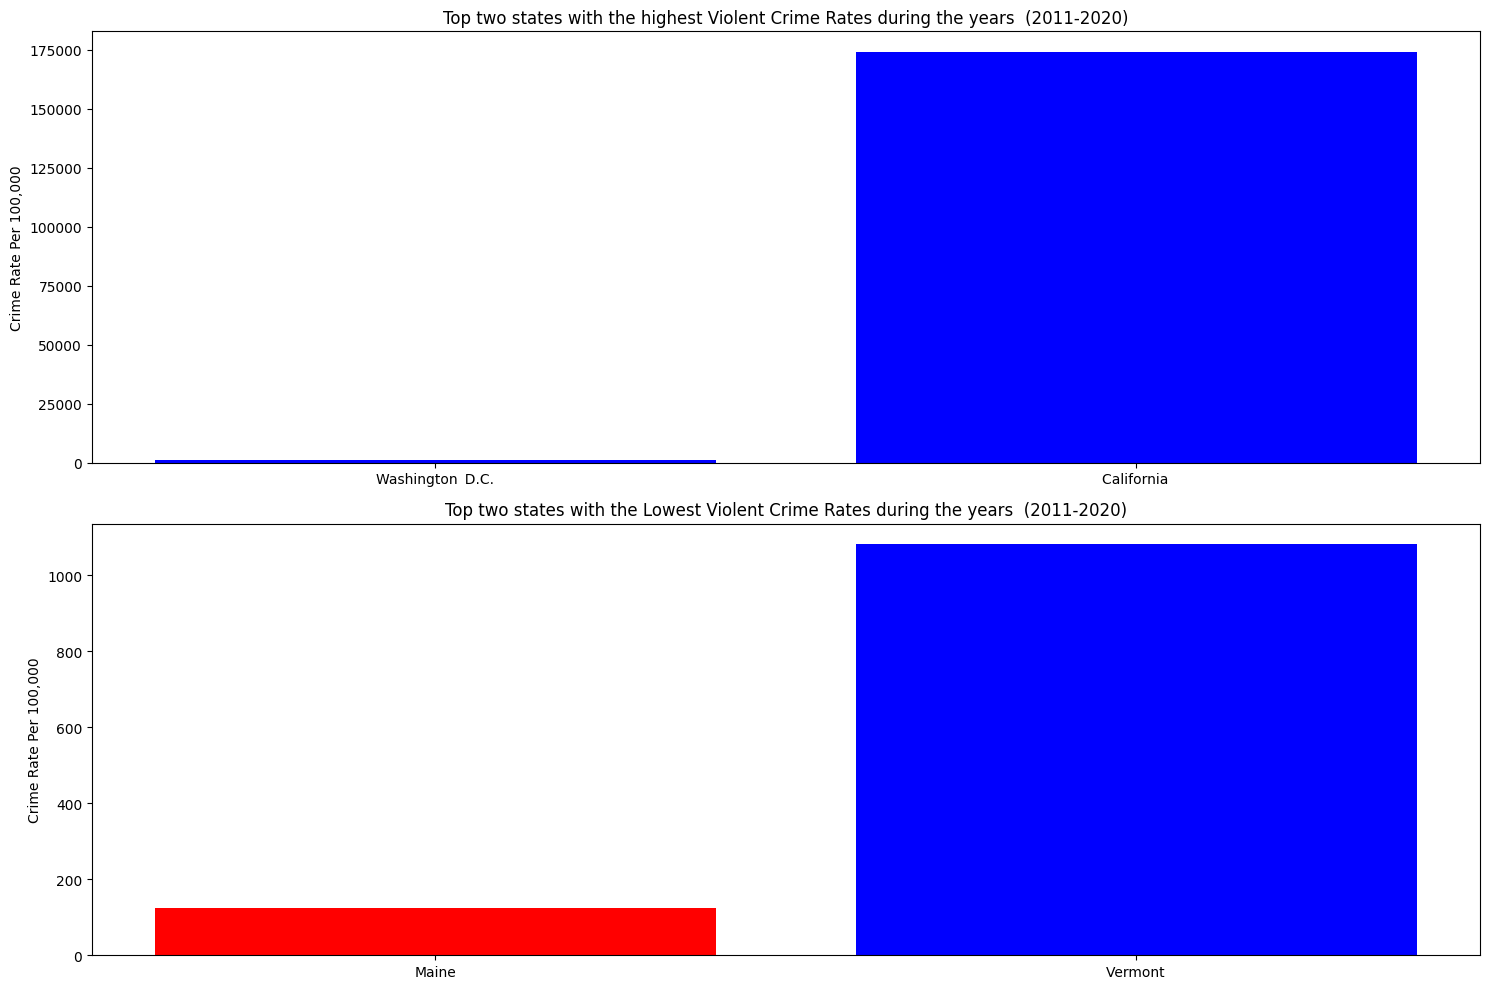

In [15]:
import matplotlib.pyplot as plt
import pandas as pd



years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

highest_values = []
lowest_values = []


for year in years:
    
    highest_state = violent_crime.loc[violent_crime[year].idxmax()]['State']
    lowest_state = violent_crime.loc[violent_crime[year].idxmin()]['State']
    
    highest_rate = violent_crime.loc[violent_crime['State'] == highest_state, year].values[0]
    lowest_rate = violent_crime.loc[violent_crime['State'] == lowest_state, year].values[0]

    highest_values.append((highest_state, highest_rate))
    lowest_values.append((lowest_state, lowest_rate))


highest_df = pd.DataFrame(highest_values, columns=['State', 'Rate'])
lowest_df = pd.DataFrame(lowest_values, columns=['State', 'Rate'])


state_colors = {
    'California': 'blue',
    'Maine': 'red',
    'Washington D.C.': 'blue',
    'Vermont': 'blue'
}

highest_df['Color'] = highest_df['State'].map(state_colors).fillna('blue')
lowest_df['Color'] = lowest_df['State'].map(state_colors).fillna('blue')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))


axes[0].bar(highest_df['State'], highest_df['Rate'], color=highest_df['Color'], label='Highest Crime Rate')
axes[0].set_title('Top two states with the highest Violent Crime Rates during the years  (2011-2020)')
axes[0].set_ylabel('Crime Rate Per 100,000')


axes[1].bar(lowest_df['State'], lowest_df['Rate'], color=lowest_df['Color'], label='Lowest Crime Rate')
axes[1].set_title('Top two states with the Lowest Violent Crime Rates during the years  (2011-2020)')
axes[1].set_ylabel('Crime Rate Per 100,000')

for ax in axes:
    ax.tick_params(axis='x', rotation=45, labelrotation=0)


plt.tight_layout()
plt.show()


 This chart shows the two states that has the highest and the lowest vionlent crime rates from 2011 to 2020 with the top two highest states being California and Washington D.C. and the lowest crime rates being Maine and Vermont.

 Opened my crimes.dataset.csv file and making the population_crime the variable 

In [16]:
import pandas as pd
population_crime= pd.read_csv("crimes.dataset.csv")
 
population_crime

,Year,Population,Violent Crimes,Violent crime rate,Murder nonnegligent manslaughter,Murder nonnegligent manslaughter rate,Rape\n(revised\ndefinition),Rape\n(revised\ndefinition)\nrate,Rape\n(legacy\ndefinition,Rape\n(legacy\ndefinition)\nrate,Robbery,Robbery\nrate,Aggravated\nassault,Aggravated\nassault rate,Property\ncrime,Property\ncrime\nrate,Burglary,Burglary\nrate,Larceny-\ntheft,Larceny-\ntheft rate,Motor\nvehicle\ntheft,Motor\nvehicle\ntheft\nrate
0,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,NaN,NaN,"90,178",32.0,"408,016",145.0,"911,706",324.0,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2
1,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,NaN,NaN,"90,863",31.8,"423,557",148.5,"909,023",318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5
2,2002,"287,973,924","1,423,677",494.4,"16,229",5.6,NaN,NaN,"95,235",33.1,"420,806",146.1,"891,407",309.5,"10,455,277","3,630.6","2,151,252",747.0,"7,057,379","2,450.7","1,246,646",432.9
3,2003,"290,788,976","1,383,676",475.8,"16,528",5.7,NaN,NaN,"93,883",32.3,"414,235",142.5,"859,030",295.4,"10,442,862","3,591.2","2,154,834",741.0,"7,026,802","2,416.5","1,261,226",433.7
4,2004,"293,656,842","1,360,088",463.2,"16,148",5.5,NaN,NaN,"95,089",32.4,"401,470",136.7,"847,381",288.6,"10,319,386","3,514.1","2,144,446",730.3,"6,937,089","2,362.3","1,237,851",421.5
5,2005,"296,507,061","1,390,745",469.0,"16,740",5.6,NaN,NaN,"94,347",31.8,"417,438",140.8,"862,220",290.8,"10,174,754","3,431.5","2,155,448",726.9,"6,783,447","2,287.8","1,235,859",416.8
6,2006,"299,398,484","1,435,123",479.3,"17,309",5.8,NaN,NaN,"94,472",31.6,"449,246",150.0,"874,096",292.0,"10,019,601","3,346.6","2,194,993",733.1,"6,626,363","2,213.2","1,198,245",400.2
7,2007,"301,621,157","1,422,970",471.8,"17,128",5.7,NaN,NaN,"92,160",30.6,"447,324",148.3,"866,358",287.2,"9,882,212","3,276.4","2,190,198",726.1,"6,591,542","2,185.4","1,100,472",364.9
8,2008,"304,059,724","1,394,461",458.6,"16,465",5.4,NaN,NaN,"90,750",29.8,"443,563",145.9,"843,683",277.5,"9,774,152","3,214.6","2,228,887",733.0,"6,586,206","2,166.1","959,059",315.4
9,2009,"307,006,550","1,325,896",431.9,"15,399",5.0,NaN,NaN,"89,241",29.1,"408,742",133.1,"812,514",264.7,"9,337,060","3,041.3","2,203,313",717.7,"6,338,095","2,064.5","795,652",259.2


 Used keep for the columns that I want in my DataFrame 

In [17]:
columns_to_keep = ['Year', 'Population', 'Violent Crimes']


population_crime = population_crime[columns_to_keep]
population_crime

,Year,Population,Violent Crimes
0,2000,"281,421,906","1,425,486"
1,2001,"285,317,559","1,439,480"
2,2002,"287,973,924","1,423,677"
3,2003,"290,788,976","1,383,676"
4,2004,"293,656,842","1,360,088"
5,2005,"296,507,061","1,390,745"
6,2006,"299,398,484","1,435,123"
7,2007,"301,621,157","1,422,970"
8,2008,"304,059,724","1,394,461"
9,2009,"307,006,550","1,325,896"


 Saved DataFrame to a new csv file named poplution_violent_crime_rate.cvs using popultation as the variable 

In [18]:

population_crime.to_csv('population_violent_crime_rate.csv', index=False)

In [19]:
population_crime

,Year,Population,Violent Crimes
0,2000,"281,421,906","1,425,486"
1,2001,"285,317,559","1,439,480"
2,2002,"287,973,924","1,423,677"
3,2003,"290,788,976","1,383,676"
4,2004,"293,656,842","1,360,088"
5,2005,"296,507,061","1,390,745"
6,2006,"299,398,484","1,435,123"
7,2007,"301,621,157","1,422,970"
8,2008,"304,059,724","1,394,461"
9,2009,"307,006,550","1,325,896"


 Made a small DataFrame so that can save as a csv file and merge with population_violent_crime_rate.csv DataFrame 

In [20]:
import pandas as pd


data = {'Year': [2020],
        'Population': ['335,942,111'],
        'Violent Crimes': ['1,313,105']}

year_2020_dataframe_for_merge = pd.DataFrame(data)

print(year_2020_dataframe_for_merge)

   Year   Population Violent Crimes
0  2020  335,942,111      1,313,105


 Save my year_2020_dataframe_for_merge DataFrame to a new csv file called 2020_population_violent_crime.cvs 

In [21]:
year_2020_dataframe_for_merge.to_csv('2020_population_violent_crime.csv', index=False)

In [22]:
year_2020_dataframe_for_merge

,Year,Population,Violent Crimes
0,2020,"335,942,111","1,313,105"


 Read two csv files and merge on year and using outer join and save the merge to merged_file.csv using variable called merge_crime_dataframes 

In [23]:
import pandas as pd

year_2020_dataframe_for_merge = pd.read_csv('2020_population_violent_crime.csv')
population_crime = pd.read_csv('population_violent_crime_rate.csv')

merge_crime_datframes = pd.merge(year_2020_dataframe_for_merge, population_crime, on='Year', how='outer')

merge_crime_datframes.to_csv('merged_file.csv', index=False)


In [24]:
merge_crime_datframes

,Year,Population_x,Violent Crimes_x,Population_y,Violent Crimes_y
0,2020,"335,942,111","1,313,105",NaN,NaN
1,2000,NaN,NaN,"281,421,906","1,425,486"
2,2001,NaN,NaN,"285,317,559","1,439,480"
3,2002,NaN,NaN,"287,973,924","1,423,677"
4,2003,NaN,NaN,"290,788,976","1,383,676"
5,2004,NaN,NaN,"293,656,842","1,360,088"
6,2005,NaN,NaN,"296,507,061","1,390,745"
7,2006,NaN,NaN,"299,398,484","1,435,123"
8,2007,NaN,NaN,"301,621,157","1,422,970"
9,2008,NaN,NaN,"304,059,724","1,394,461"


 Read merged_file.csv DataFrame and filled in missing values and drop unneccary columns and print DataFrame 

In [25]:
import pandas as pd

Violent_Population = pd.read_csv('merged_file.csv')


Violent_Population['Population'] = Violent_Population['Population_x'].fillna(Violent_Population['Population_y'])
Violent_Population['Violent Crimes'] = Violent_Population['Violent Crimes_x'].fillna(Violent_Population['Violent Crimes_y'])


Violent_Population = Violent_Population.drop(['Population_x', 'Violent Crimes_x', 'Population_y', 'Violent Crimes_y'], axis=1)

print(Violent_Population)


    Year   Population Violent Crimes
0   2020  335,942,111      1,313,105
1   2000  281,421,906      1,425,486
2   2001  285,317,559      1,439,480
3   2002  287,973,924      1,423,677
4   2003  290,788,976      1,383,676
5   2004  293,656,842      1,360,088
6   2005  296,507,061      1,390,745
7   2006  299,398,484      1,435,123
8   2007  301,621,157      1,422,970
9   2008  304,059,724      1,394,461
10  2009  307,006,550      1,325,896
11  2010  309,330,219      1,251,248
12  2011  311,587,816      1,206,005
13  2012  313,873,685      1,217,057
14  2013  316,497,531      1,168,298
15  2014  318,907,401      1,153,022
16  2015  320,896,618      1,199,310
17  2016  323,405,935      1,250,162
18  2017  325,147,121      1,247,917
19  2018  326,687,501      1,209,997
20  2019  328,239,523      1,203,808


 I moved top row to bottom using pd.concat and used reset_index and display changes to DataFrame 

In [26]:
import pandas as pd

data = {
    'Year': [2020, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'Population': ['335,942,111', '281,421,906', '285,317,559', '287,973,924', '290,788,976', '293,656,842', '296,507,061', '299,398,484', '301,621,157', '304,059,724', '307,006,550', '309,330,219', '311,587,816', '313,873,685', '316,497,531', '318,907,401', '320,896,618', '323,405,935', '325,147,121', '326,687,501', '328,239,523'],
    'Violent Crimes': ['1,313,105', '1,425,486', '1,439,480', '1,423,677', '1,383,676', '1,360,088', '1,390,745', '1,435,123', '1,422,970', '1,394,461', '1,325,896', '1,251,248', '1,206,005', '1,217,057', '1,168,298', '1,153,022', '1,199,310', '1,250,162', '1,247,917', '1,209,997', '1,203,808']
}

Violent_Population = pd.DataFrame(data)


Violent_Population = pd.concat([Violent_Population.iloc[1:], Violent_Population.iloc[:1]])


Violent_Population.reset_index(drop=True, inplace=True)


print(Violent_Population)


    Year   Population Violent Crimes
0   2000  281,421,906      1,425,486
1   2001  285,317,559      1,439,480
2   2002  287,973,924      1,423,677
3   2003  290,788,976      1,383,676
4   2004  293,656,842      1,360,088
5   2005  296,507,061      1,390,745
6   2006  299,398,484      1,435,123
7   2007  301,621,157      1,422,970
8   2008  304,059,724      1,394,461
9   2009  307,006,550      1,325,896
10  2010  309,330,219      1,251,248
11  2011  311,587,816      1,206,005
12  2012  313,873,685      1,217,057
13  2013  316,497,531      1,168,298
14  2014  318,907,401      1,153,022
15  2015  320,896,618      1,199,310
16  2016  323,405,935      1,250,162
17  2017  325,147,121      1,247,917
18  2018  326,687,501      1,209,997
19  2019  328,239,523      1,203,808
20  2020  335,942,111      1,313,105


 Save my cleaned and finished DataFrame to violent_population_cleaned_dataframe.cvs file using Violent_Population variable

In [27]:
Violent_Population.to_csv('violent_population_cleaned_dataframe.csv', index=False)

 Made a line chart to so the population and violent crime rates using the Violent_Population DataFrame

 This line chart show the population growth and the violent crime rates from 2000-2020 in the United States.

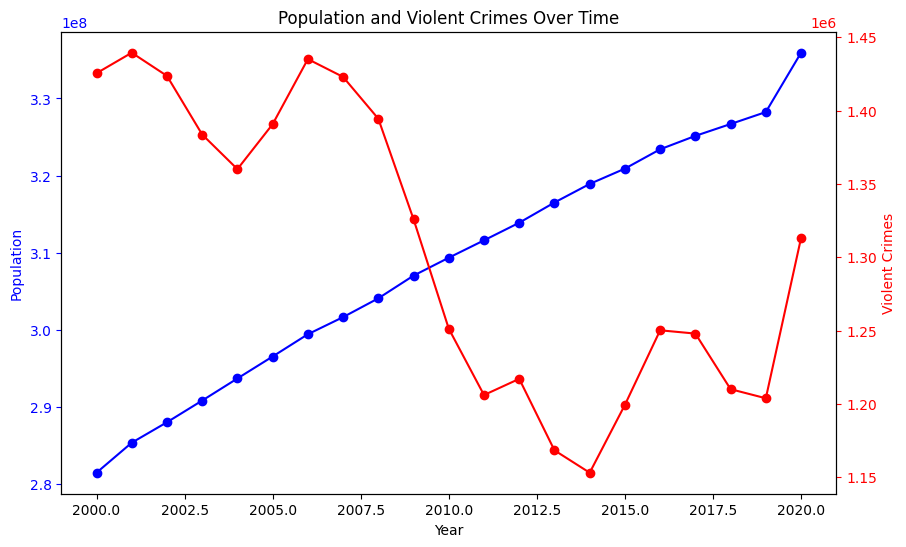

In [28]:
import matplotlib.pyplot as plt
import pandas as pd


Violent_Population['Population'] = pd.to_numeric(Violent_Population['Population'].astype(str).str.replace(',', ''), errors='coerce')


Violent_Population['Violent Crimes'] = pd.to_numeric(Violent_Population['Violent Crimes'].astype(str).str.replace(',', ''), errors='coerce')

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.plot(Violent_Population['Year'], Violent_Population['Population'], marker='o', label='Population', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(Violent_Population['Year'], Violent_Population['Violent Crimes'], marker='o', label='Violent Crimes', color='r')
ax2.set_ylabel('Violent Crimes', color='r')
ax2.tick_params('y', colors='r')

plt.title('Population and Violent Crimes Over Time')
plt.show()


 This chart shows the Population rate in blue and the Violent Crime rates in red from 2000 to 2020. 

 I calcutated the population growth and calcutated the violent crimes from 2020 to 2020 using data from my Violent_Population DataFrame

In [29]:
import pandas as pd

data = {'Year': list(range(2000, 2021)),
        'Population': [281421906, 285317559, 287973924, 290788976, 293656842, 296507061, 299398484, 301621157,
                       304059724, 307006550, 309330219, 311587816, 313873685, 316497531, 318907401, 320896618,
                       323405935, 325147121, 326687501, 328239523, 335942111],
        'Violent Crimes': [1425486, 1439480, 1423677, 1383676, 1360088, 1390745, 1435123, 1422970, 1394461,
                           1325896, 1251248, 1206005, 1217057, 1168298, 1153022, 1199310, 1250162, 1247917,
                           1209997, 1203808, 1313105]}

Violent_Population = pd.DataFrame(data)

Violent_Population['Population Growth'] = Violent_Population['Population'].pct_change() * 100

Violent_Population['Violent Crimes Percentage'] = Violent_Population['Violent Crimes'] / Violent_Population['Population'] * 100

total_population_growth = Violent_Population['Population Growth'].sum()
total_violent_crimes_percentage = (Violent_Population['Violent Crimes'] / Violent_Population['Population']).mean() * 100

print(f'Total Population Growth from 2000 to 2020: {total_population_growth:.2f}%')
print(f'Total Violent Crimes Percentage from 2000 to 2020: {total_violent_crimes_percentage:.2f}%')


Total Population Growth from 2000 to 2020: 17.80%
Total Violent Crimes Percentage from 2000 to 2020: 0.43%


 Made a chart calculating the percentage of the Population and Violent crimes from 2000 to 2020 in the United States using data from my Violent_Population DataFrame 

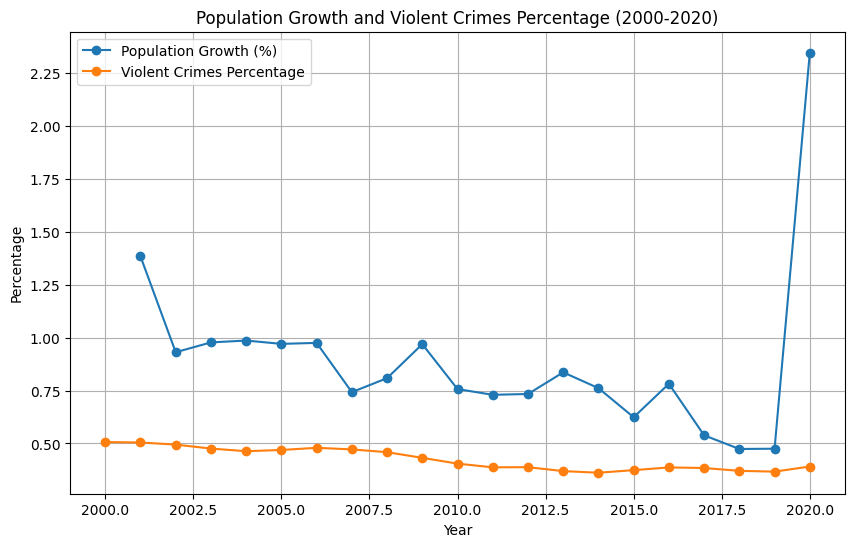

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Year': list(range(2000, 2021)),
        'Population': [281421906, 285317559, 287973924, 290788976, 293656842, 296507061, 299398484, 301621157,
                       304059724, 307006550, 309330219, 311587816, 313873685, 316497531, 318907401, 320896618,
                       323405935, 325147121, 326687501, 328239523, 335942111],
        'Violent Crimes': [1425486, 1439480, 1423677, 1383676, 1360088, 1390745, 1435123, 1422970, 1394461,
                           1325896, 1251248, 1206005, 1217057, 1168298, 1153022, 1199310, 1250162, 1247917,
                           1209997, 1203808, 1313105]}

Violent_Population = pd.DataFrame(data)

Violent_Population['Population Growth'] = Violent_Population['Population'].pct_change() * 100

Violent_Population['Violent Crimes Percentage'] = Violent_Population['Violent Crimes'] / Violent_Population['Population'] * 100

plt.figure(figsize=(10, 6))

plt.plot(Violent_Population['Year'], Violent_Population['Population Growth'], label='Population Growth (%)', marker='o')
plt.plot(Violent_Population['Year'], Violent_Population['Violent Crimes Percentage'], label='Violent Crimes Percentage', marker='o')

plt.title('Population Growth and Violent Crimes Percentage (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()


 This line chart show the Total Population Growth from 2000 to 2020 being 17.80% and
  the Total Violent Crimes Percentage from 2000 to 2020 being 0.43%
